# CHB-MIT Scalp EEG Database

The CHB-MIT dataset includes data from 23 patients, one of which (chb21) was obtained 1.5 years after the other patient (chb01). Researchers from Massachusetts Institute of Technology (MIT) and Children's Hospital Boston gathered the dataset. Due to hardware constraints, the median duration of the collection was 36 hours, with brief intervals between records per hour.

There are 198 different kinds of seizures (focal, lateral, and generalized seizures) in the data. The majority of the files included 23 EEG signals that were positioned using the International 10-20 method. All signals were captured at 256 samples per second.

One of the most well-known datasets in the literature, it offers extended, continuous recordings for every patient, making it possible to create and evaluate models that are both patient-specific and patient-general.


| Subject   | Age/Gender | Seizure Events | Total Ictal Time (secs) | Total Inter-ictal Time (secs) |
|-----------|------------|----------------|------------------|----------------------|
| chb01/chb21 | 11, 13 (F) | 11 | 641  | 263461 |
| chb02       | 11 (M)     | 3  | 172  | 126751 |
| chb03       | 14 (F)     | 7  | 402  | 136366 |
| chb04       | 22 (M)     | 4  | 378  | 561414 |
| chb05       | 7 (F)      | 5  | 558  | 139813 |
| chb06       | 1.5 (F)    | 10 | 153  | 240075 |
| chb07       | 14.5 (F)   | 3  | 325  | 241044 |
| chb08       | 3.5 (M)    | 5  | 919  | 71084  |
| chb09       | 10 (F)     | 4  | 276  | 244043 |
| chb10       | 3 (M)      | 7  | 447  | 179612 |
| chb11       | 12 (F)     | 3  | 806  | 124416 |
| chb12       | 2 (F)      | 27 | 989  | 73466  |
| chb13       | 3 (F)      | 12 | 535  | 118232 |
| chb14       | 9 (F)      | 8  | 169  | 93405  |
| chb15       | 16 (M)     | 20 | 1992 | 142004 |
| chb16       | 7 (F)      | 10 | 84   | 68297  |
| chb17       | 12 (F)     | 3  | 293  | 75310  |
| chb18       | 18 (F)     | 6  | 317  | 127932 |
| chb19       | 19 (F)     | 3  | 236  | 107480 |
| chb20       | 6 (F)      | 8  | 294  | 99043  |
| chb22       | 9 (F)      | 3  | 204  | 111376 |
| chb23       | 6 (F)      | 7  | 424  | 95177  |
| chb24       | NR (NR)    | 16 | 511  | 76134  |
| **Total**   | -          | **185**| **11125**| **3515935**|

**NOTE**
- There are only 185 seizures altogether in the table above. Thats because the method used to load the data into Python does not work on few files. By excluding files 27, 28, and 29, the number of seizure occurrences in patient 12 is decreased from 40 to 27.

**1. Total Ictal Time (secs):**

* "Ictal" refers to the period during which a seizure occurs.
* "Total Ictal Time" is the sum of the durations of all seizure events for a particular subject.
* It represents the amount of time the subject experiences seizures.

**2. Total Inter-ictal Time (secs):**

* "Inter-ictal" refers to the periods between seizures when the brain activity is not showing signs of a seizure.
* "Total Inter-ictal Time" is the sum of the durations of all non-seizure periods for a particular subject.
* It represents the amount of time the subject spends in a non-seizure state.

## Data Exploration
The dataset is stored on Physionet, which offers a number of useful tools for data access. One such package, wfdb, will be used by us to obtain a list of the dataset's records.


In [2]:
!pip install wfdb

In [3]:
import wfdb

dbs = wfdb.get_dbs()

records_list = wfdb.io.get_record_list('chbmit', records='all')
records_list

['chb01/chb01_01.edf',
 'chb01/chb01_02.edf',
 'chb01/chb01_03.edf',
 'chb01/chb01_04.edf',
 'chb01/chb01_05.edf',
 'chb01/chb01_06.edf',
 'chb01/chb01_07.edf',
 'chb01/chb01_08.edf',
 'chb01/chb01_09.edf',
 'chb01/chb01_10.edf',
 'chb01/chb01_11.edf',
 'chb01/chb01_12.edf',
 'chb01/chb01_13.edf',
 'chb01/chb01_14.edf',
 'chb01/chb01_15.edf',
 'chb01/chb01_16.edf',
 'chb01/chb01_17.edf',
 'chb01/chb01_18.edf',
 'chb01/chb01_19.edf',
 'chb01/chb01_20.edf',
 'chb01/chb01_21.edf',
 'chb01/chb01_22.edf',
 'chb01/chb01_23.edf',
 'chb01/chb01_24.edf',
 'chb01/chb01_25.edf',
 'chb01/chb01_26.edf',
 'chb01/chb01_27.edf',
 'chb01/chb01_29.edf',
 'chb01/chb01_30.edf',
 'chb01/chb01_31.edf',
 'chb01/chb01_32.edf',
 'chb01/chb01_33.edf',
 'chb01/chb01_34.edf',
 'chb01/chb01_36.edf',
 'chb01/chb01_37.edf',
 'chb01/chb01_38.edf',
 'chb01/chb01_39.edf',
 'chb01/chb01_40.edf',
 'chb01/chb01_41.edf',
 'chb01/chb01_42.edf',
 'chb01/chb01_43.edf',
 'chb01/chb01_46.edf',
 'chb02/chb02_01.edf',
 'chb02/chb

Unique directory names:

In [4]:
part_codes = sorted(list(set([record.split('/')[0] for record in records_list])))
part_codes

['chb01',
 'chb02',
 'chb03',
 'chb04',
 'chb05',
 'chb06',
 'chb07',
 'chb08',
 'chb09',
 'chb10',
 'chb11',
 'chb12',
 'chb13',
 'chb14',
 'chb15',
 'chb16',
 'chb17',
 'chb18',
 'chb19',
 'chb20',
 'chb21',
 'chb22',
 'chb23',
 'chb24']

Every patient has a corresponding information file. Before parsing it into anything more usable, let's load one file.

Getting info from chb01-summary.txt file in chb01 folder (Patient 1) of the dataset.


In [5]:
import os
from urllib.request import urlretrieve

def get_content(part_code):
  url = "https://physionet.org/physiobank/database/chbmit/"+part_code+'/'+part_code+'-summary.txt'
  filename = "./chbmit.txt"

  urlretrieve(url,filename)

  # read the file into a list
  with open(filename, encoding='UTF-8') as f:
      # read all the document into a list of strings (each line a new string)
      content = f.readlines()
      os.remove(filename)

  return content

# Getting info from chb01-summary.txt file in chb01 folder (Patient 1) of the dataset.
get_content(part_codes[0])

['Data Sampling Rate: 256 Hz\n',
 '*************************\n',
 '\n',
 'Channels in EDF Files:\n',
 '**********************\n',
 'Channel 1: FP1-F7\n',
 'Channel 2: F7-T7\n',
 'Channel 3: T7-P7\n',
 'Channel 4: P7-O1\n',
 'Channel 5: FP1-F3\n',
 'Channel 6: F3-C3\n',
 'Channel 7: C3-P3\n',
 'Channel 8: P3-O1\n',
 'Channel 9: FP2-F4\n',
 'Channel 10: F4-C4\n',
 'Channel 11: C4-P4\n',
 'Channel 12: P4-O2\n',
 'Channel 13: FP2-F8\n',
 'Channel 14: F8-T8\n',
 'Channel 15: T8-P8\n',
 'Channel 16: P8-O2\n',
 'Channel 17: FZ-CZ\n',
 'Channel 18: CZ-PZ\n',
 'Channel 19: P7-T7\n',
 'Channel 20: T7-FT9\n',
 'Channel 21: FT9-FT10\n',
 'Channel 22: FT10-T8\n',
 'Channel 23: T8-P8\n',
 '\n',
 'File Name: chb01_01.edf\n',
 'File Start Time: 11:42:54\n',
 'File End Time: 12:42:54\n',
 'Number of Seizures in File: 0\n',
 '\n',
 'File Name: chb01_02.edf\n',
 'File Start Time: 12:42:57\n',
 'File End Time: 13:42:57\n',
 'Number of Seizures in File: 0\n',
 '\n',
 'File Name: chb01_03.edf\n',
 'File Sta

Using the information from above, the code below simply parses the file into a Python dictionary format for future usage. To see an example of how it looks, view the output.

In [6]:
import re
from IPython.display import display

# ANSI escape codes for formatting
class Color:
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

part_info_dict = {}

def info_dict(content):
    line_nos = len(content)
    line_no = 1

    channels = []
    file_name = []
    file_info_dict = {}

    for line in content:
        # if there is Channel in the line...
        if re.findall('Channel \d+', line):
            # split the line into channel number and channel reference
            channel = line.split(': ')
            # get the channel reference and remove any new lines
            channel = channel[-1].replace("\n", "")
            # put into the channel list
            channels.append(channel)

        # if the line is the file name
        elif re.findall('File Name', line):
            # if there is already a file_name
            if file_name:
                # flush the current file info to it
                part_info_dict[file_name] = file_info_dict

            # get the file name
            file_name = re.findall('\w+\d+_\d+|\w+\d+\w+_\d+', line)[0]

            file_info_dict = {}
            # put the channel list in the file info dict and remove duplicates
            file_info_dict['Channels'] = list(set(channels))
            # reset the rest of the options
            file_info_dict['Start Time'] = ''
            file_info_dict['End Time'] = ''
            file_info_dict['Seizures Window'] = []

        # if the line is about the file start time
        elif re.findall('File Start Time', line):
            # get the start time
            file_info_dict['Start Time'] = re.findall('\d+:\d+:\d+', line)[0]

        # if the line is about the file end time
        elif re.findall('File End Time', line):
            # get the start time
            file_info_dict['End Time'] = re.findall('\d+:\d+:\d+', line)[0]

        elif re.findall('Seizure Start Time|Seizure End Time|Seizure \d+ Start Time|Seizure \d+ End Time', line):
            file_info_dict['Seizures Window'].append(int(re.findall('\d+', line)[-1]))

        # if last line in the list...
        if line_no == line_nos:
            # flush the file info to it
            part_info_dict[file_name] = file_info_dict

        line_no += 1

for part_code in part_codes:
    content = get_content(part_code)
    info_dict(content)

# Display part_info_dict for a specific record i.e. 'chb01_18'
print(Color.BOLD + Color.UNDERLINE + 'part_info_dict' + Color.END)
display(part_info_dict['chb01_18'])
print(Color.UNDERLINE + '\nPart Keys' + Color.END)
print(part_info_dict[list(part_info_dict.keys())[0]].keys())

part_info_dict


{'Channels': ['F7-T7',
  'FT10-T8',
  'T7-P7',
  'FP1-F3',
  'P7-O1',
  'T7-FT9',
  'C3-P3',
  'F8-T8',
  'FZ-CZ',
  'FP1-F7',
  'F4-C4',
  'P3-O1',
  'P7-T7',
  'FT9-FT10',
  'C4-P4',
  'T8-P8',
  'FP2-F4',
  'P8-O2',
  'F3-C3',
  'CZ-PZ',
  'FP2-F8',
  'P4-O2'],
 'Start Time': '04:45:06',
 'End Time': '5:45:06',
 'Seizures Window': [1720, 1810]}


Part Keys
dict_keys(['Channels', 'Start Time', 'End Time', 'Seizures Window'])


Extracting information about channels for each participant, and then it counts how many times each channel appears across all participants.

In [7]:
import pandas as pd     # dataframes
import re

all_channels = []

for key in part_info_dict.keys():
    all_channels.extend(part_info_dict[key]['Channels'])

# turn the list into a pandas series
all_channels = pd.Series(all_channels)

# count how many times the channels appear in each participant
channel_counts = all_channels.value_counts()
channel_counts

F7-T7      675
F4-C4      675
P4-O2      675
FP2-F8     675
CZ-PZ      675
          ... 
F4          13
CZ          13
CP6         13
PZ          13
LOC-ROC     11
Length: 87, dtype: int64

As seen above, some channels are unique to each patient, but there is also a common set of channels that are present in ALL patients. This is a result of occasionally switching channels while recording something else.

In view of the fact that certain channels are not found in every patient, taking a very cautious approach to keeping them for all patients is must. This makes it easier to create models for all patients, however if you're only training models that can detect seizures in specific patients this is not necessary.

In [8]:
threshold = len(part_info_dict.keys())
channel_keeps = list(channel_counts[channel_counts >= threshold].index)
channel_keeps

['F7-T7',
 'F4-C4',
 'P4-O2',
 'FP2-F8',
 'CZ-PZ',
 'F3-C3',
 'P8-O2',
 'FP2-F4',
 'T8-P8',
 'C4-P4',
 'P3-O1',
 'FP1-F7',
 'FZ-CZ',
 'F8-T8',
 'C3-P3',
 'P7-O1',
 'FP1-F3',
 'T7-P7']

## Data Loading
Load in some example data. Choose a file ('chb01_18').

In [9]:
EXAMPLE_FILE = records_list[17]
EXAMPLE_ID = EXAMPLE_FILE.split('/')[1].split('.')[0]
EXAMPLE_ID

'chb01_18'

Downloading the data and loading it into a pandas dataframe.




In [10]:
!pip install pyedflib

In [11]:
%%time
import pandas as pd
import numpy as np
import pyedflib
from IPython.display import display

def data_load(file, selected_channels=[]):

  try:
    url = "https://physionet.org/physiobank/database/chbmit/"+file
    filename = "./chbmit.edf"

    urlretrieve(url,filename)
    # use the reader to get an EdfReader file
    f = pyedflib.EdfReader(filename)
    os.remove(filename)

    # get a list of the EEG channels
    if len(selected_channels) == 0:
      selected_channels = f.getSignalLabels()

    # get the names of the signals
    channel_names = f.getSignalLabels()
    # get the sampling frequencies of each signal
    channel_freq = f.getSampleFrequencies()

    # make an empty file of 0's
    sigbufs = np.zeros((f.getNSamples()[0],len(selected_channels)))
    # for each of the channels in the selected channels
    for i, channel in enumerate(selected_channels):
      # add the channel data into the array
      sigbufs[:, i] = f.readSignal(channel_names.index(channel))

    # turn to a pandas df and save a little space
    df = pd.DataFrame(sigbufs, columns = selected_channels).astype('float32')

    # get equally increasing numbers upto the length of the data depending
    # on the length of the data divided by the sampling frequency
    index_increase = np.linspace(0,
                                 len(df)/channel_freq[0],
                                 len(df), endpoint=False)

    # round these to the lowest nearest decimal to get the seconds
    seconds = np.floor(index_increase).astype('uint16')

    # make a column the timestamp
    df['Time'] = seconds

    # make the time stamp the index
    df = df.set_index('Time')

    # name the columns as channel
    df.columns.name = 'Channel'

    return df, channel_freq[0]

  except:
    OSError
    return pd.DataFrame(), None


raw_data, freq = data_load(EXAMPLE_FILE, channel_keeps)
display(raw_data)

Channel,F7-T7,F4-C4,P4-O2,FP2-F8,CZ-PZ,F3-C3,P8-O2,FP2-F4,T8-P8,C4-P4,P3-O1,FP1-F7,FZ-CZ,F8-T8,C3-P3,P7-O1,FP1-F3,T7-P7
Time,,,,,,,,,,,,,,,,,,
0,63.492062,25.982906,-75.213676,-28.717949,18.949940,11.916972,-192.429794,50.598289,0.976801,-116.630035,35.750916,35.360195,-44.346764,104.908424,8.791209,16.214897,51.770451,-6.837607
0,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360
0,0.195360,0.195360,0.195360,0.195360,-0.195360,0.195360,-0.586081,0.195360,0.195360,-0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360
0,0.586081,0.195360,-2.930403,-1.758242,-1.758242,0.195360,-6.837607,0.195360,-0.195360,-3.711844,0.195360,-0.195360,-0.586081,2.148962,-0.195360,0.195360,0.195360,0.195360
0,0.195360,0.195360,-1.758242,0.195360,1.758242,0.195360,-0.195360,0.195360,0.195360,1.367521,0.195360,0.195360,0.586081,0.195360,0.195360,0.195360,0.195360,0.195360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3599,5.274725,57.240536,-21.684982,-15.042735,-22.466423,8.009768,-8.791209,-31.843712,-44.346764,-0.586081,-14.652015,-25.592186,44.346764,71.697189,-11.135531,-19.340660,-5.665446,15.433455
3599,11.135531,67.399269,-75.213676,-11.135531,-20.512821,16.214897,-56.459095,-27.545788,-39.658119,4.102564,-22.466423,-19.340660,50.989010,77.167274,-11.135531,-24.810745,0.586081,15.433455
3599,16.605618,73.650795,-100.610504,-9.963370,-18.949940,22.857143,-87.326004,-24.420025,-36.532356,-3.711844,-22.857143,-12.698413,55.677654,79.120880,-16.214897,-23.638584,6.056166,9.181930


CPU times: user 2.48 s, sys: 1.28 s, total: 3.77 s
Wall time: 49.9 s


The displayed DataFrame (raw_data) contains EEG data for 18 selected channels over time. Each row represents a time point, and each column represents a specific EEG channel.








## Data Plotting

Using the dictionary to mark an annotation as to where the seizures are in the record.

In [12]:
!pip install mne

Creating RawArray with float64 data, n_channels=18, n_times=921600
    Range : 0 ... 921599 =      0.000 ...  3599.996 secs
Ready.
Setting up band-pass filter from 0.5 - 50 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 50.00 Hz: -6.02, -6.02 dB

Using matplotlib as 2D backend.


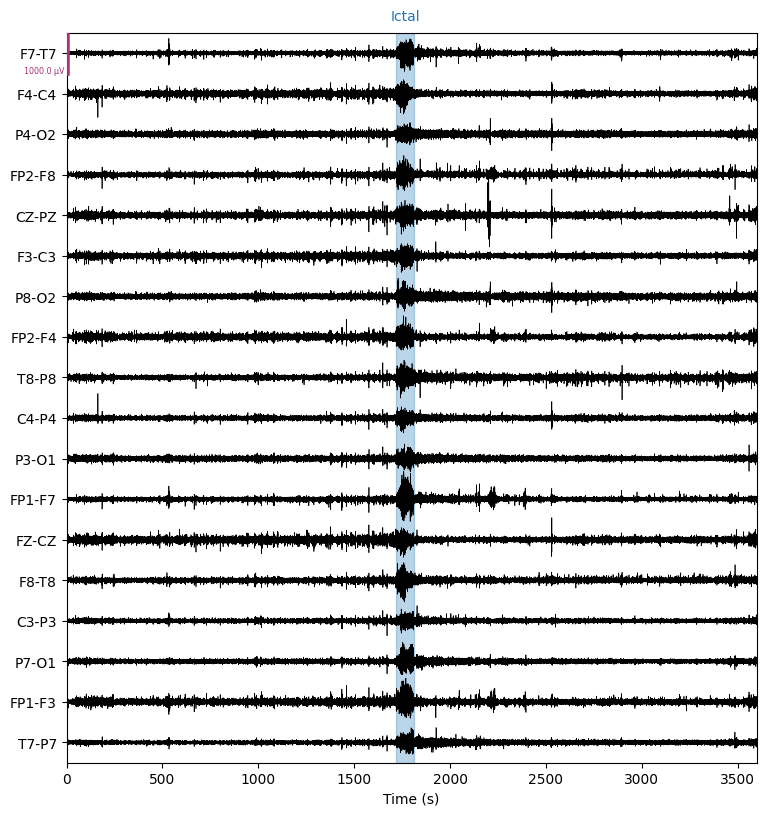

In [13]:
import mne

def mne_object(data, freq, events=None):
    # create an mne info file with meta data about the EEG
    info = mne.create_info(ch_names=list(data.columns),
                           sfreq=freq,
                           ch_types=['eeg'] * data.shape[-1])

    # data needs to be in volts rather than in microvolts
    data = data.apply(lambda x: x * 1e-6)
    # transpose the data
    data_T = data.transpose()

    # create raw mne object
    raw = mne.io.RawArray(data_T, info)

    if events:
        start_times = np.array(events[::2])
        end_times = np.array(events[1::2])
        anno_length = end_times - start_times
        event_name = np.array(['Ictal'] * len(anno_length))

        raw.set_annotations(mne.Annotations(start_times,
                                            anno_length,
                                            event_name))

    return raw

mne_data = mne_object(raw_data, freq, part_info_dict[EXAMPLE_ID]['Seizures Window'])

plot_kwargs = {
    'scalings': dict(eeg=50e-5),   # adjust scaling for better visibility
    'highpass': 0.5,                # filters out low frequencies
    'lowpass': 50.,                 # filters out high frequencies
    'show_scrollbars': False,
    'show': True
}

mne_data.plot(start=0, duration=3599, **plot_kwargs);


Setting up band-pass filter from 0.5 - 50 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 50.00 Hz: -6.02, -6.02 dB



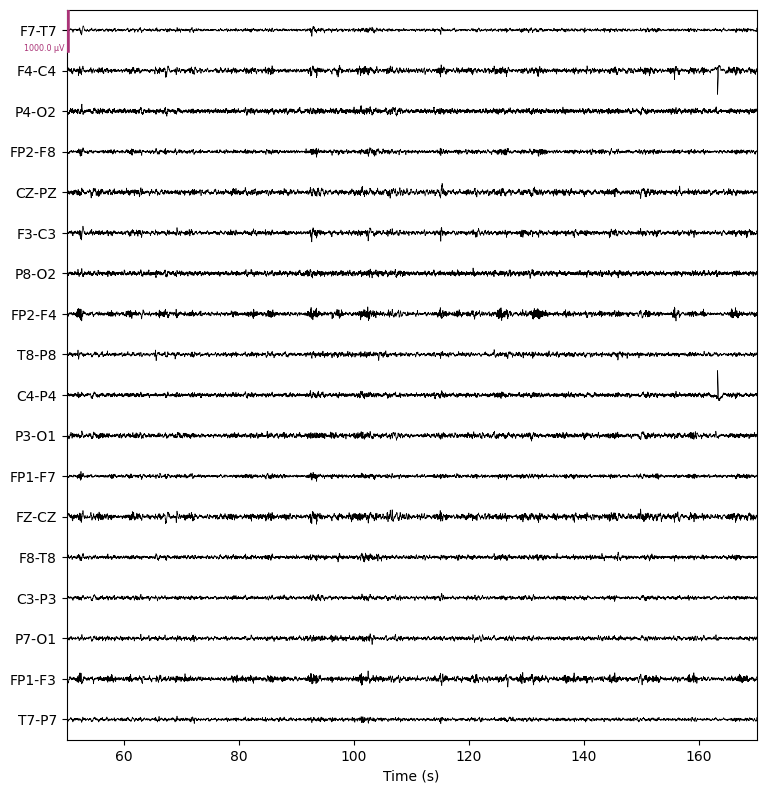

In [14]:
mne_data.plot(start = 50,
              duration = 120, **plot_kwargs);

Setting up band-pass filter from 0.5 - 50 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 50.00 Hz: -6.02, -6.02 dB



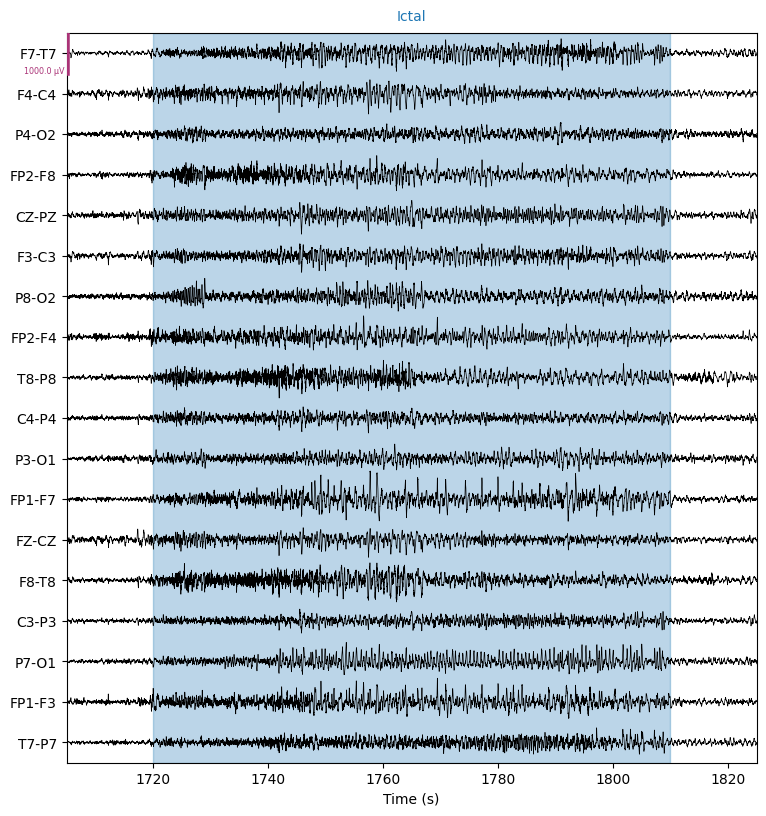

In [15]:
seiz_start_time = part_info_dict[EXAMPLE_ID]['Seizures Window'][0]
mne_data.plot(start = seiz_start_time-15,
              duration = 120, **plot_kwargs);

**FYI:** From 'chb01_summary.txt'

'File Name: chb01_18.edf',

'File Start Time: 04:45:06',

'File End Time: 5:45:06',

'Number of Seizures in File: 1',

'Seizure Start Time: 1720 seconds',

'Seizure End Time: 1810 seconds'

The MNE plot displays EEG data with annotations for seizures, providing a visual representation of the EEG signals during both normal and seizure periods.

## Load data for each patient
Load in Patient 1 data from chb01 folder.

In [19]:
!pip install pyedflib

In [20]:
%%time
import pandas as pd
import numpy as np
import pyedflib
from IPython.display import display

def data_load(file, selected_channels=[]):

  try:
    url = "https://physionet.org/physiobank/database/chbmit/"+file
    filename = "./chbmit.edf"

    urlretrieve(url,filename)
    # use the reader to get an EdfReader file
    f = pyedflib.EdfReader(filename)
    os.remove(filename)

    # get a list of the EEG channels
    if len(selected_channels) == 0:
      selected_channels = f.getSignalLabels()

    # get the names of the signals
    channel_names = f.getSignalLabels()
    # get the sampling frequencies of each signal
    channel_freq = f.getSampleFrequencies()

    # make an empty file of 0's
    sigbufs = np.zeros((f.getNSamples()[0],len(selected_channels)))
    # for each of the channels in the selected channels
    for i, channel in enumerate(selected_channels):
      # add the channel data into the array
      sigbufs[:, i] = f.readSignal(channel_names.index(channel))

    # turn to a pandas df and save a little space
    df = pd.DataFrame(sigbufs, columns = selected_channels).astype('float32')

    # get equally increasing numbers upto the length of the data depending
    # on the length of the data divided by the sampling frequency
    index_increase = np.linspace(0,
                                 len(df)/channel_freq[0],
                                 len(df), endpoint=False)

    # round these to the lowest nearest decimal to get the seconds
    seconds = np.floor(index_increase).astype('uint16')

    # make a column the timestamp
    df['Time'] = seconds

    # make the time stamp the index
    df = df.set_index('Time')

    # name the columns as channel
    df.columns.name = 'Channel'

    return df, channel_freq[0]

  except:
    OSError
    return pd.DataFrame(), None

CPU times: user 30 µs, sys: 0 ns, total: 30 µs
Wall time: 35.3 µs


In [21]:
df_dict_chb01 = {}  # Dictionary to store DataFrames for chb01

for file in records_list:
    if 'chb01' in file:
        print("Loading", file)
        file_id = file.split('/')[1].split('.')[0]
        df_dict_chb01[file_id], channel_freq = data_load(file, channel_keeps)


Loading chb01/chb01_01.edf
Loading chb01/chb01_02.edf
Loading chb01/chb01_03.edf
Loading chb01/chb01_04.edf
Loading chb01/chb01_05.edf
Loading chb01/chb01_06.edf
Loading chb01/chb01_07.edf
Loading chb01/chb01_08.edf
Loading chb01/chb01_09.edf
Loading chb01/chb01_10.edf
Loading chb01/chb01_11.edf
Loading chb01/chb01_12.edf
Loading chb01/chb01_13.edf
Loading chb01/chb01_14.edf
Loading chb01/chb01_15.edf
Loading chb01/chb01_16.edf
Loading chb01/chb01_17.edf
Loading chb01/chb01_18.edf
Loading chb01/chb01_19.edf
Loading chb01/chb01_20.edf
Loading chb01/chb01_21.edf
Loading chb01/chb01_22.edf
Loading chb01/chb01_23.edf
Loading chb01/chb01_24.edf
Loading chb01/chb01_25.edf
Loading chb01/chb01_26.edf
Loading chb01/chb01_27.edf
Loading chb01/chb01_29.edf
Loading chb01/chb01_30.edf
Loading chb01/chb01_31.edf
Loading chb01/chb01_32.edf
Loading chb01/chb01_33.edf
Loading chb01/chb01_34.edf
Loading chb01/chb01_36.edf
Loading chb01/chb01_37.edf
Loading chb01/chb01_38.edf
Loading chb01/chb01_39.edf
L

## Data Preprocessing and Preparation for Feature Extraction

| Class | Label |
|-----------|------------|
| 0 | Non - Seizure |
| 1 | Seizure |

In [22]:
# Add output labels to the loaded data
final_df_chb01 = pd.DataFrame()

for file_name in df_dict_chb01.keys():
    df = df_dict_chb01[file_name]
    df['label'] = 0

    if part_info_dict[file_name]['Seizures Window'] != []:
        start_time = part_info_dict[file_name]['Seizures Window'][0]
        end_time = part_info_dict[file_name]['Seizures Window'][1]

        df.loc[df.index.isin(range(start_time, end_time)), 'label'] = 1

    final_df_chb01 = pd.concat([final_df_chb01, df], ignore_index=True)

In [23]:
final_df_chb01['label'].value_counts()

0    37259776
1      113152
Name: label, dtype: int64

In [24]:
final_df_chb01

Channel,F7-T7,F4-C4,P4-O2,FP2-F8,CZ-PZ,F3-C3,P8-O2,FP2-F4,T8-P8,C4-P4,P3-O1,FP1-F7,FZ-CZ,F8-T8,C3-P3,P7-O1,FP1-F3,T7-P7,label
0,-104.517708,-1.367521,-14.261294,-267.838837,84.590965,-110.769234,74.822952,-139.291824,44.737484,63.882782,-56.459095,-145.934067,-106.080589,57.240536,11.916972,-33.015873,-170.940170,-42.783882,0
1,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0
2,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,-0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0
3,0.586081,0.195360,-1.367521,-0.586081,0.195360,0.195360,-2.148962,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,1.367521,0.195360,0.586081,0.195360,0.195360,0
4,0.195360,0.195360,0.586081,-0.195360,0.195360,0.195360,0.976801,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,-0.195360,0.195360,0.195360,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37372923,-7.228327,31.062271,-29.890110,13.479854,70.134308,13.089133,-1.367521,43.956043,35.360195,10.354091,-21.684982,-4.102564,44.346764,6.837607,-0.195360,7.228327,11.526252,7.619048,0
37372924,-8.791209,30.671551,-24.810745,13.479854,85.372406,16.214897,4.493285,37.313797,35.360195,11.526252,-22.466423,-0.976801,57.631256,0.195360,2.539683,9.963370,15.042735,11.135531,0
37372925,-9.181930,42.783882,-25.592186,1.367521,-3.321123,20.903542,4.493285,28.717949,38.485958,10.744811,-32.234432,9.181930,-5.274725,11.135531,-2.539683,7.619048,27.155067,4.493285,0
37372926,-7.228327,50.598289,-24.420025,-6.056166,-21.294262,27.155067,7.228327,24.029305,38.876678,10.354091,-41.611721,16.605618,-26.373627,19.340660,-7.228327,2.148962,36.532356,3.321123,0


In [ ]:
# Mount Google Drive to Colab
from google.colab import drive
drive.mount('/content/gdrive')

# Specify the path in your Google Drive where you want to save the CSV file
file_path_drive = '/content/gdrive/My Drive/EEG Data/final_df_chb01.csv'

# Save the final DataFrame to a CSV file
final_df_chb01.to_csv(file_path_drive, index=False)

# Print a message indicating the save is complete
print(f"CSV file saved successfully: {file_path_drive}")

Mounted at /content/gdrive
CSV file saved successfully: /content/gdrive/MyDrive/EEG Data/final_df_chb01.csv


In [ ]:
import os

# Specify the path to the CSV file
file_path_drive = '/content/gdrive/MyDrive/EEG Data/final_df_chb01.csv'

# Get file size in bytes
file_size_bytes = os.path.getsize(file_path_drive)

# Convert bytes to kilobytes (1 KB = 1024 bytes)
file_size_kb = file_size_bytes / 1024

# Convert bytes to megabytes (1 MB = 1024 KB)
file_size_mb = file_size_kb / 1024

# Print the file size
print(f"File Size: {file_size_bytes} bytes, {file_size_kb:.2f} KB, {file_size_mb:.2f} MB")


File Size: 6898320694 bytes, 6736641.30 KB, 6578.75 MB


While using Google Colab, the project ran into a number of serious computing resource issues. The EEG dataset was more than 42 GB, more than the Colab platform could accommodate. Further activities were hampered by Colab's processing power restrictions, even after the first patient's data from Electroencephalogram (EEG) files were successfully loaded into a CSV format and labels were added for feature extraction and machine learning model training. Unfortunately, the computational resources required for model training and prediction were more than the Colab environment could provide.



To address this, the project attempted to mitigate the issue by subsetting the data, simplifying model architectures, and optimizing code for efficiency. However, these tactics proved inadequate, leading to the exploration of substitute approaches, like GPU-supporting cloud computing systems with scalable resources. The restrictions that were observed emphasize how crucial it is to match the scope of the project with the computational resources that are available and look into alternate platforms for handling massive datasets in future work.

### Use SMOTE to balance dataset.

During the data preprocessing stage, output labels were integrated into the EEG data to differentiate between Class 1 seizures and Class 0 non-seizures. There is definitely a noticeable class disparity. More specifically, there are 37,259,776 non-seizures and 113,152 seizures.

In order to overcome the difficulty presented by unbalanced datasets, it is critical to understand that conventional machine learning models frequently perform less well because they are unable to efficiently learn from the minority class. Future improvements could include the Synthetic Minority Oversampling Technique (SMOTE) to address this problem. Creating synthetic instances for the minority class is a key component of SMOTE, a useful tactic for reducing class imbalance and enhancing the model's capacity to recognize seizure events—which are usually more significant from a clinical standpoint.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# apply train test split before smote

X = final_df_chb01.drop('label', axis=1)
y = final_df_chb01['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

In [ ]:
# Normalize dataset on a scale of 0 to 1

from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize all columns to a scale of 0 to 1
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
X_train[0]

## Model Selection & Building

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model training and evaluation
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier()
}

for name, model in models.items():
    print(f"Training and evaluating {name}")

    # Cross-validation
    cv_score = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5)
    print(f"Cross-validation accuracy: {np.mean(cv_score):.4f}")

    # Training
    model.fit(X_train_resampled, y_train_resampled)

    # Prediction
    y_pred = model.predict(X_test)

    # Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test accuracy: {accuracy:.4f}")

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\n" + "=" * 50 + "\n")